In [353]:
#!pip install yfinance

In [393]:
import pandas as pd

SyntaxError: invalid syntax (909918806.py, line 2)

In [2]:
!pip install yfinance
import yfinance as yf
timeframe = '5y'

In [8]:

stocks = ("^GSPC", "^IXIC", "000001.SS", "^N100", "^NDX")
def load_data(ticker):
    data = yf.download(ticker, period=timeframe)
    data.reset_index(inplace=True)
    return data

df_stocks = load_data(stocks)
df_stocks.set_index('Date', inplace=True)
df_stocks = df_stocks['Open']

df_stocks = df_stocks.reset_index(level=0)
df_stocks = df_stocks.rename(columns={'Date': 'datetime'})

import os  
os.makedirs('.\data\data_1', exist_ok=True) 
df_stocks.to_csv('.\data\data_1\df_stocks.csv')  # saving until saved in Python script

 


[*********************100%***********************]  5 of 5 completed


In [ ]:
df_stocks

,datetime,000001.SS,^GSPC,^IXIC,^N100,^NDX
0,2017-07-14,3212.031982,2449.159912,6289.080078,1008.159973,5815.040039
1,2017-07-17,3219.791016,2459.500000,6320.350098,1010.400024,5845.819824
2,2017-07-18,3159.731934,2455.879883,6304.819824,1007.530029,5832.919922
3,2017-07-19,3181.402100,2463.850098,6363.240234,1004.760010,5898.399902
4,2017-07-20,3227.506104,2475.560059,6396.459961,1012.309998,5929.580078
...,...,...,...,...,...,...
1296,2022-07-08,3380.370117,3888.260010,11503.610352,1169.170044,11977.950195
1297,2022-07-11,3341.100098,3880.939941,11524.490234,1154.849976,12008.759766
1298,2022-07-12,3307.219971,3851.949951,11420.889648,1162.000000,11926.839844
1299,2022-07-13,3279.600098,3779.669922,11056.549805,1169.270020,11523.910156


In [358]:
import san
import pandas as pd

san.ApiConfig.api_key = ''
year = 5
days = 365
future_metrics = ['whale_transaction_count_100k_usd_to_inf_change_1d',
                  'whale_transaction_count_1m_usd_to_inf_change_30d']

old_metrics = ['price_usd', 'volume_usd', 
                'daily_active_addresses', 'network_growth', 
                'transaction_volume_usd', 'transaction_volume',
                'velocity', 'dev_activity', 'social_dominance_total',
                'social_volume_total', 'twitter_followers',
                'sentiment_positive_total', 'sentiment_negative_total',
                ]

metrics = ['price_usd', 
           'volume_usd',
           'twitter_followers',
           'daily_opening_price_usd', 
           'daily_high_price_usd', 
           'daily_low_price_usd', 
           'daily_closing_price_usd', 
           'daily_avg_price_usd', 
           'daily_trading_volume_usd', 
           'marketcap_usd', 
           'mvrv_usd', 
           'nvt', 
           'circulation_1d', 
           'dormant_circulation_90d', 
           'exchange_balance', 
           'daily_active_addresses', 
           'network_growth',
           'transaction_volume', 
           'transaction_volume_usd', 
           'fees_usd',
           'velocity', 
           'dev_activity', 
           'dev_activity_contributors_count', 
           'sentiment_positive_total', 
           'sentiment_negative_total', 
           'sentiment_balance_total', 
           'social_dominance_total', 
           'social_volume_total', 
           'unique_social_volume_total_5m', 
           'whale_transaction_count_100k_usd_to_inf', 
           'whale_transaction_count_1m_usd_to_inf'
           ]

tketh = 'ethereum'
tkbtc = 'bitcoin'

df_eth = pd.DataFrame()
df_btc = pd.DataFrame()

for metric in metrics:
    df_eth[metric] = san.get(
        metric + '/' + tketh,
        from_date=f"utc_now - {year*days}d",
        to_date="utc_now",
        interval="1d"
    )


In [359]:
df_eth['twitter_followers'].iloc[0] = 0

In [360]:
df_eth['twitter_followers'] = df_eth['twitter_followers'].interpolate()


In [361]:
df_eth

,price_usd,volume_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,daily_trading_volume_usd,marketcap_usd,...,dev_activity,dev_activity_contributors_count,sentiment_positive_total,sentiment_negative_total,sentiment_balance_total,social_dominance_total,social_volume_total,unique_social_volume_total_5m,whale_transaction_count_100k_usd_to_inf,whale_transaction_count_1m_usd_to_inf
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-15 00:00:00+00:00,170.655000,8.104520e+08,0.000000e+00,199.709000,200.161000,170.655000,170.655000,185.212941,8.104520e+08,1.592395e+10,...,8.0,5.0,119.002066,147.557097,-28.555031,15.897348,1296.0,208.0,5346.0,7.0
2017-07-16 00:00:00+00:00,157.363000,1.516890e+09,1.572588e+03,169.574000,172.014000,133.723000,157.363000,156.804604,1.516890e+09,1.468744e+10,...,34.0,14.0,356.991370,431.692530,-74.701160,19.218078,3772.0,720.0,12105.0,60.0
2017-07-17 00:00:00+00:00,193.424000,1.669500e+09,3.145176e+03,159.991000,194.753000,158.044000,193.424000,172.514333,1.669500e+09,1.805774e+10,...,121.0,25.0,349.644277,344.685442,4.958835,17.077093,3347.0,689.0,11605.0,42.0
2017-07-18 00:00:00+00:00,234.391000,2.709260e+09,4.717765e+03,195.027000,267.986000,182.059000,234.391000,204.764931,2.709260e+09,2.188796e+10,...,363.0,28.0,443.970685,447.300174,-3.329489,19.096022,4114.0,670.0,15189.0,65.0
2017-07-19 00:00:00+00:00,199.703000,2.328790e+09,6.290353e+03,234.941000,245.651000,191.745000,199.703000,225.754365,2.328790e+09,1.865361e+10,...,209.0,15.0,412.811217,524.256566,-111.445349,19.841263,4241.0,760.0,13533.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 00:00:00+00:00,1168.401611,1.098456e+10,2.671018e+06,1216.625268,1216.797657,1157.175540,1168.401611,1182.985909,1.098456e+10,1.419541e+11,...,44.0,19.0,16870.116309,4194.883867,12675.232442,25.270687,21230.0,2130.0,2328.0,336.0
2022-07-11 00:00:00+00:00,1097.236515,1.206418e+10,2.672475e+06,1167.707855,1169.193825,1095.126569,1097.236515,1142.838904,1.206418e+10,1.333228e+11,...,387.0,61.0,17005.983356,4565.016826,12440.966530,19.145268,22003.0,3452.0,3091.0,441.0
2022-07-12 00:00:00+00:00,1038.191695,1.258328e+10,2.674690e+06,1096.552881,1097.069843,1038.135642,1038.191695,1070.672908,1.258328e+10,1.261626e+11,...,389.0,69.0,5722.548847,2608.451176,3114.097672,12.781081,8614.0,3466.0,3653.0,543.0


In [362]:

df_btc['price_usd'] = san.get(
        'price_usd' + '/' + tkbtc,
        from_date=f"utc_now - {year*days}d",
        to_date="utc_now",
        interval="1d"
    )

df_btc = df_btc.rename(columns={'price_usd': 'btc_price_usd'})

In [363]:
df_crypto = pd.merge(df_eth, df_btc, how='outer', on='datetime')

In [364]:
df_crypto.index = pd.to_datetime(df_crypto.index)

In [365]:
df_crypto = df_crypto.reset_index(level=0)

In [366]:
df_crypto['datetime'] = df_crypto['datetime'].apply(lambda x: x.replace(tzinfo=None))

In [367]:
df_crypto

,datetime,price_usd,volume_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,daily_trading_volume_usd,...,dev_activity_contributors_count,sentiment_positive_total,sentiment_negative_total,sentiment_balance_total,social_dominance_total,social_volume_total,unique_social_volume_total_5m,whale_transaction_count_100k_usd_to_inf,whale_transaction_count_1m_usd_to_inf,btc_price_usd
0,2017-07-15,170.655000,8.104520e+08,0.000000e+00,199.709000,200.161000,170.655000,170.655000,185.212941,8.104520e+08,...,5.0,119.002066,147.557097,-28.555031,15.897348,1296.0,208.0,5346.0,7.0,1998.860000
1,2017-07-16,157.363000,1.516890e+09,1.572588e+03,169.574000,172.014000,133.723000,157.363000,156.804604,1.516890e+09,...,14.0,356.991370,431.692530,-74.701160,19.218078,3772.0,720.0,12105.0,60.0,1929.820000
2,2017-07-17,193.424000,1.669500e+09,3.145176e+03,159.991000,194.753000,158.044000,193.424000,172.514333,1.669500e+09,...,25.0,349.644277,344.685442,4.958835,17.077093,3347.0,689.0,11605.0,42.0,2228.410000
3,2017-07-18,234.391000,2.709260e+09,4.717765e+03,195.027000,267.986000,182.059000,234.391000,204.764931,2.709260e+09,...,28.0,443.970685,447.300174,-3.329489,19.096022,4114.0,670.0,15189.0,65.0,2318.880000
4,2017-07-19,199.703000,2.328790e+09,6.290353e+03,234.941000,245.651000,191.745000,199.703000,225.754365,2.328790e+09,...,15.0,412.811217,524.256566,-111.445349,19.841263,4241.0,760.0,13533.0,105.0,2273.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-07-10,1168.401611,1.098456e+10,2.671018e+06,1216.625268,1216.797657,1157.175540,1168.401611,1182.985909,1.098456e+10,...,19.0,16870.116309,4194.883867,12675.232442,25.270687,21230.0,2130.0,2328.0,336.0,20860.449393
1822,2022-07-11,1097.236515,1.206418e+10,2.672475e+06,1167.707855,1169.193825,1095.126569,1097.236515,1142.838904,1.206418e+10,...,61.0,17005.983356,4565.016826,12440.966530,19.145268,22003.0,3452.0,3091.0,441.0,19970.556593
1823,2022-07-12,1038.191695,1.258328e+10,2.674690e+06,1096.552881,1097.069843,1038.135642,1038.191695,1070.672908,1.258328e+10,...,69.0,5722.548847,2608.451176,3114.097672,12.781081,8614.0,3466.0,3653.0,543.0,19323.914856
1824,2022-07-13,1113.587153,1.830259e+10,2.676918e+06,1038.186585,1113.587153,1019.220319,1113.587153,1066.349852,1.830259e+10,...,76.0,4477.614679,2362.385329,2115.229350,11.479176,7183.0,4218.0,4265.0,716.0,20212.073498


In [368]:
# DEFILLAMA

import requests

url_total_TVL = 'https://api.llama.fi/charts'
url_eth_TVL = 'https://api.llama.fi/charts/Ethereum'

r_total_TVL = requests.get(url_total_TVL)
r_eth_TVL = requests.get(url_eth_TVL)

json_total_TVL = r_total_TVL.json()
json_eth_TVL = r_eth_TVL.json()
df_total_TVL = pd.DataFrame(json_total_TVL)
df_eth_TVL = pd.DataFrame(json_eth_TVL)

In [369]:

df_total_TVL = df_total_TVL.rename(columns={'totalLiquidityUSD': 'total_TVL', 'date': 'datetime'})
df_eth_TVL = df_eth_TVL.rename(columns={'totalLiquidityUSD': 'eth_TVL', 'date': 'datetime'})


In [370]:
df_tvl = pd.merge(df_total_TVL, df_eth_TVL, how='outer', on='datetime')

In [371]:
df_tvl['datetime'] = df_tvl['datetime'].apply(lambda x:datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [372]:
df_tvl['datetime'] = pd.to_datetime(df_tvl['datetime'])

In [373]:
df_tvl

,datetime,total_TVL,eth_TVL
0,2018-11-03,3.468404e+04,3.468404e+04
1,2018-11-04,4.129299e+04,4.129299e+04
2,2018-11-05,4.155031e+04,4.155031e+04
3,2018-11-06,4.323356e+04,4.323356e+04
4,2018-11-07,1.538626e+05,1.538626e+05
...,...,...,...
1345,2022-07-10,7.804470e+10,4.895357e+10
1346,2022-07-11,7.637071e+10,4.779272e+10
1347,2022-07-12,7.405698e+10,4.633532e+10
1348,2022-07-13,7.241011e+10,4.501321e+10


In [374]:
# CRYPTOSLAM
eth_NFT_sales = pd.read_csv(os.path.join('..','raw_data', 'ETH NFT Sales.csv'))
total_NFT_sales = pd.read_csv(os.path.join('..','raw_data', 'Total NFT Sales.csv'))

In [375]:
eth_NFT_sales = eth_NFT_sales.rename(columns={'Sales (USD) (y)': 'eth_NFT_sales', 'Unique Buyers (y)': 'eth_NFT_buyers', 'DateTime': 'datetime'})
total_NFT_sales = total_NFT_sales.rename(columns={'Sales (USD) (y)': 'total_NFT_sales', 'Unique Buyers (y)': 'total_NFT_buyers', 'DateTime': 'datetime'})

In [376]:
df_NFT = pd.merge(eth_NFT_sales, total_NFT_sales, how='outer', on='datetime')


In [377]:
df_NFT['datetime'] = pd.to_datetime(df_NFT['datetime'])

In [378]:
df_NFT

,datetime,eth_NFT_sales,eth_NFT_buyers,total_NFT_sales,total_NFT_buyers
0,2017-06-23,1455.93,9,1455.93,9
1,2017-06-24,845.73,7,845.73,7
2,2017-06-25,593.68,7,593.68,7
3,2017-06-26,1076.49,10,1076.49,10
4,2017-06-27,2090.85,8,2090.85,8
...,...,...,...,...,...
1798,2022-07-10,16750596.42,13205,19310139.95,40092
1799,2022-07-11,14574042.54,14355,17449920.08,43668
1800,2022-07-12,15642122.61,15676,18884615.57,45364
1801,2022-07-13,16519466.28,13972,20053088.85,43598


In [379]:
data = pd.DataFrame()
data = pd.merge(df_crypto, df_NFT, how='inner', on='datetime')
data = pd.merge(data, df_tvl, how='left', on='datetime')
data = pd.merge(data, df_stocks, how='left', on='datetime')

features_toplot = (['000001.SS', '^GSPC', '^IXIC', '^N100', '^NDX', 'twitter_followers'])
for feature in features_toplot:
    data[feature] = data[feature].interpolate()

In [380]:
data

,datetime,price_usd,volume_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,daily_trading_volume_usd,...,eth_NFT_buyers,total_NFT_sales,total_NFT_buyers,total_TVL,eth_TVL,000001.SS,^GSPC,^IXIC,^N100,^NDX
0,2017-07-15,170.655000,8.104520e+08,0.000000e+00,199.709000,200.161000,170.655000,170.655000,185.212941,8.104520e+08,...,4,394.03,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-07-16,157.363000,1.516890e+09,1.572588e+03,169.574000,172.014000,133.723000,157.363000,156.804604,1.516890e+09,...,2,316.45,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-07-17,193.424000,1.669500e+09,3.145176e+03,159.991000,194.753000,158.044000,193.424000,172.514333,1.669500e+09,...,5,1628.20,5,NaN,NaN,3219.791016,2459.500000,6320.350098,1010.400024,5845.819824
3,2017-07-18,234.391000,2.709260e+09,4.717765e+03,195.027000,267.986000,182.059000,234.391000,204.764931,2.709260e+09,...,11,3998.08,11,NaN,NaN,3159.731934,2455.879883,6304.819824,1007.530029,5832.919922
4,2017-07-19,199.703000,2.328790e+09,6.290353e+03,234.941000,245.651000,191.745000,199.703000,225.754365,2.328790e+09,...,5,2808.81,5,NaN,NaN,3181.402100,2463.850098,6363.240234,1004.760010,5898.399902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2022-07-10,1168.401611,1.098456e+10,2.671018e+06,1216.625268,1216.797657,1157.175540,1168.401611,1182.985909,1.098456e+10,...,13205,19310139.95,40092,7.804470e+10,4.895357e+10,3360.735107,3884.599976,11514.050293,1162.010010,11993.354980
1777,2022-07-11,1097.236515,1.206418e+10,2.672475e+06,1167.707855,1169.193825,1095.126569,1097.236515,1142.838904,1.206418e+10,...,14355,17449920.08,43668,7.637071e+10,4.779272e+10,3341.100098,3880.939941,11524.490234,1154.849976,12008.759766
1778,2022-07-12,1038.191695,1.258328e+10,2.674690e+06,1096.552881,1097.069843,1038.135642,1038.191695,1070.672908,1.258328e+10,...,15676,18884615.57,45364,7.405698e+10,4.633532e+10,3307.219971,3851.949951,11420.889648,1162.000000,11926.839844
1779,2022-07-13,1113.587153,1.830259e+10,2.676918e+06,1038.186585,1113.587153,1019.220319,1113.587153,1066.349852,1.830259e+10,...,13972,20053088.85,43598,7.241011e+10,4.501321e+10,3279.600098,3779.669922,11056.549805,1169.270020,11523.910156


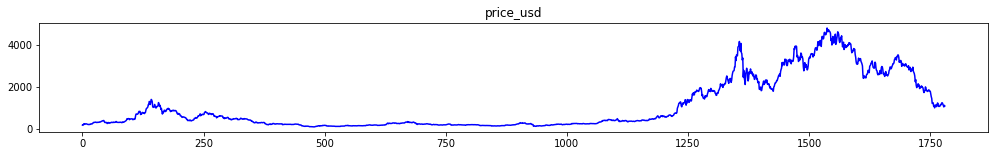

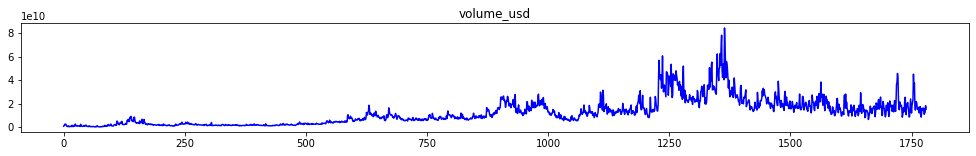

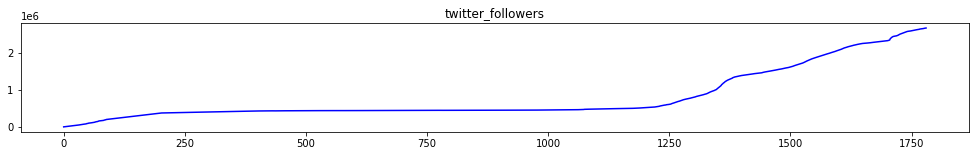

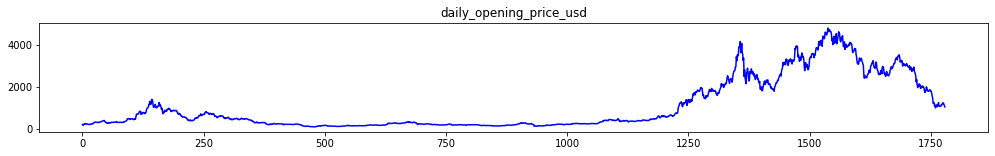

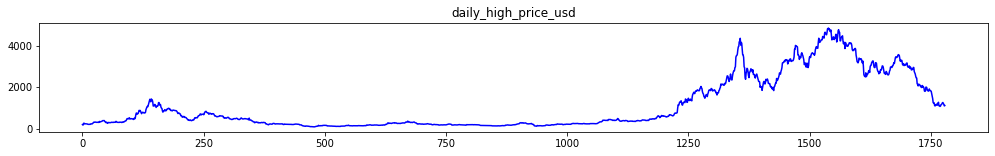

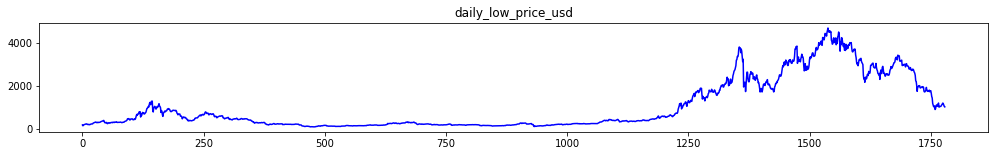

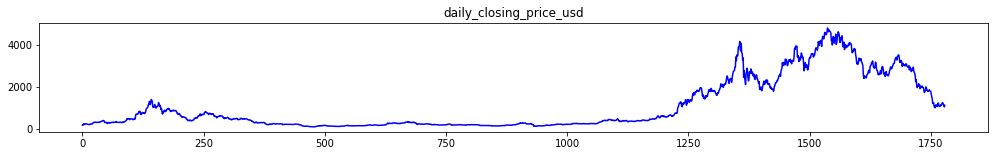

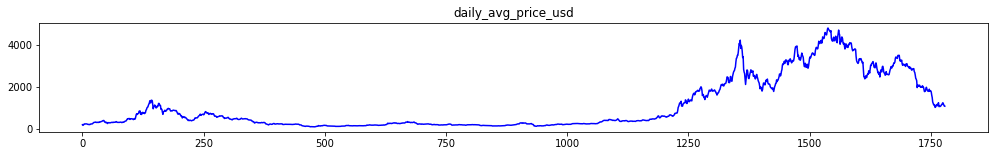

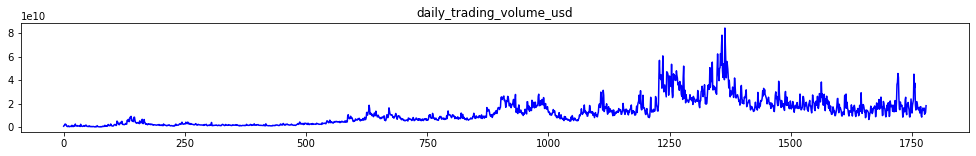

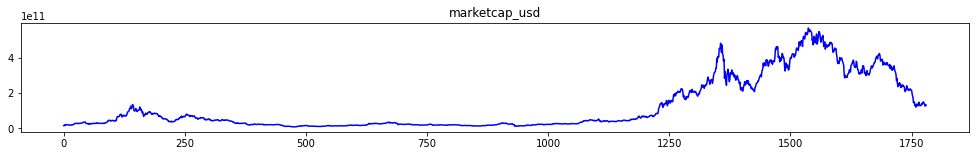

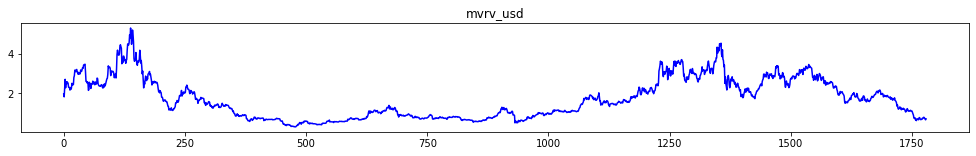

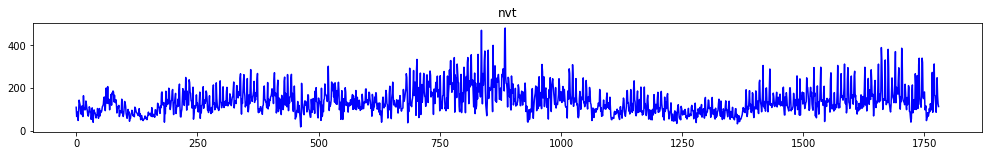

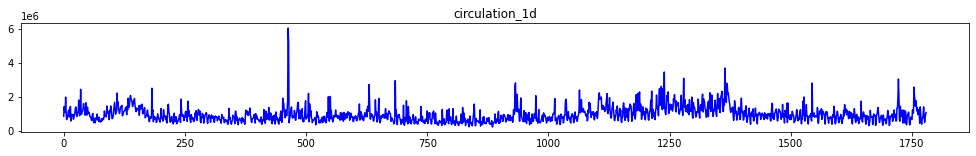

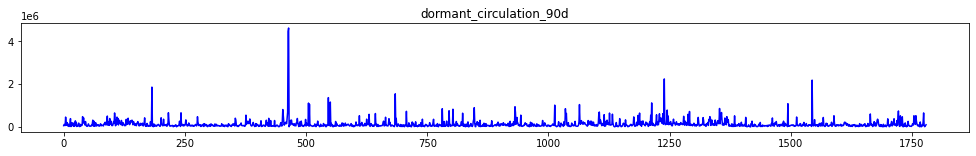

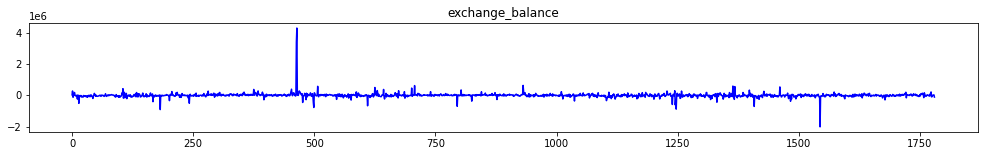

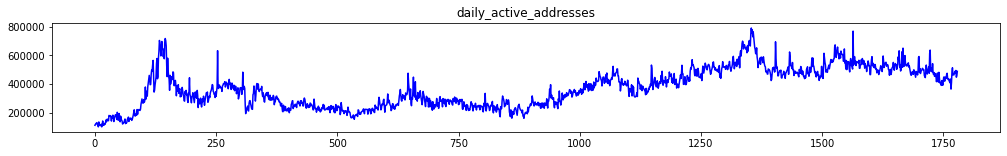

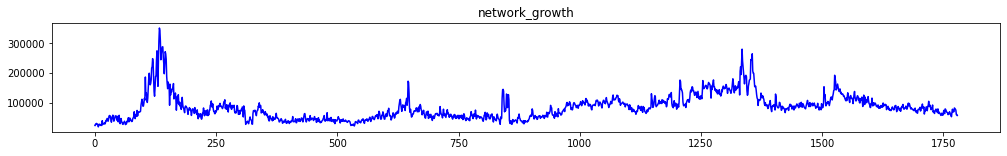

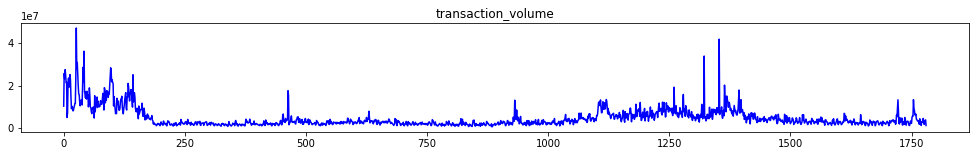

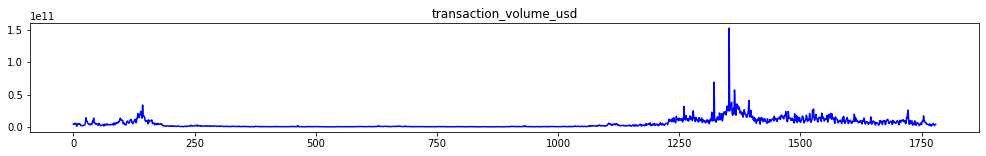

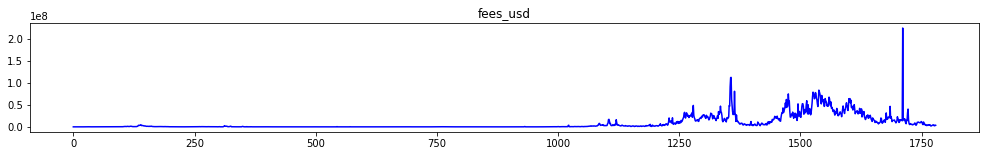

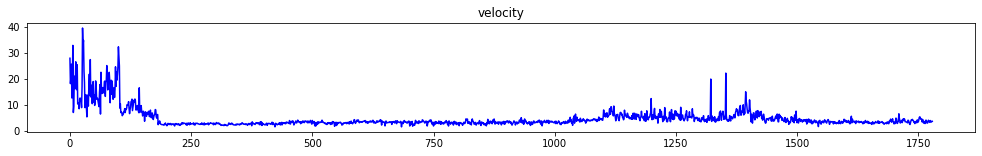

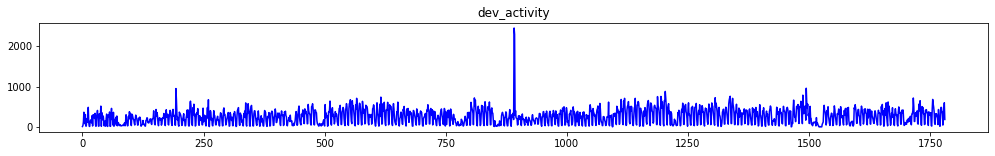

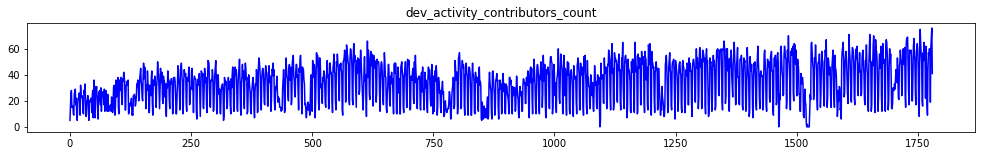

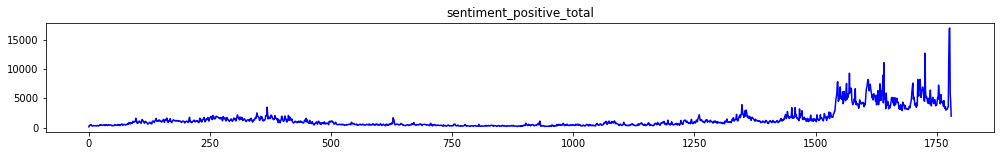

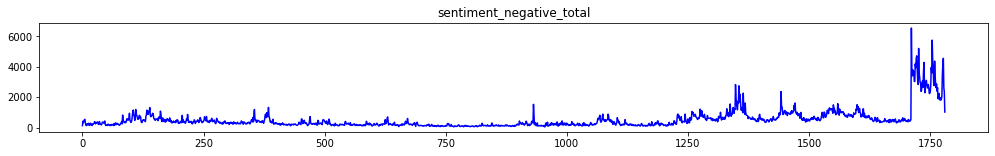

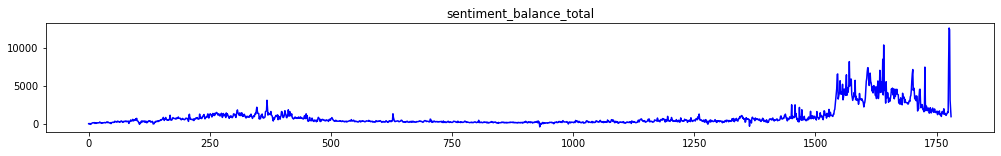

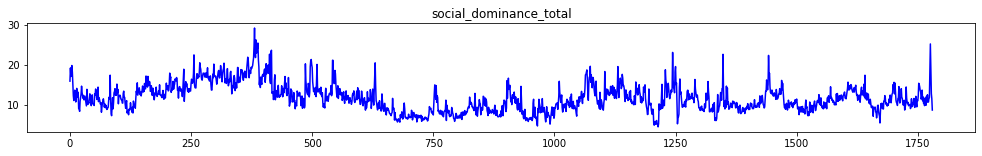

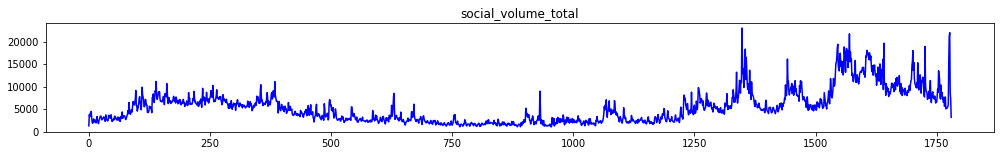

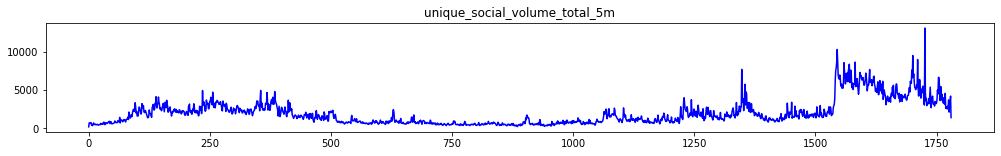

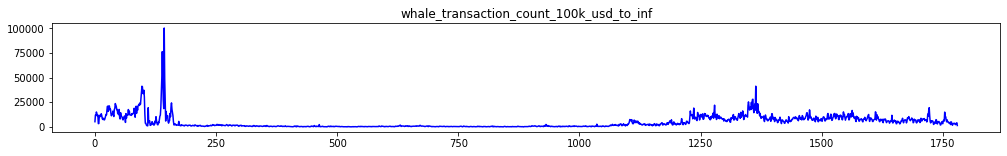

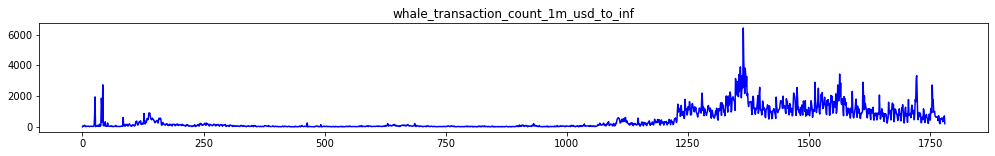

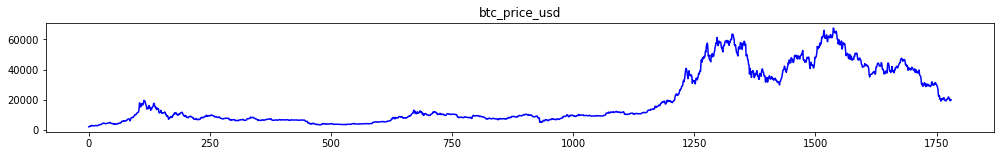

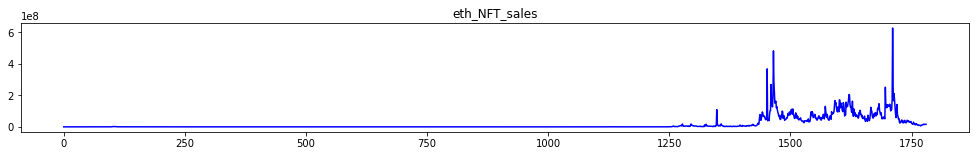

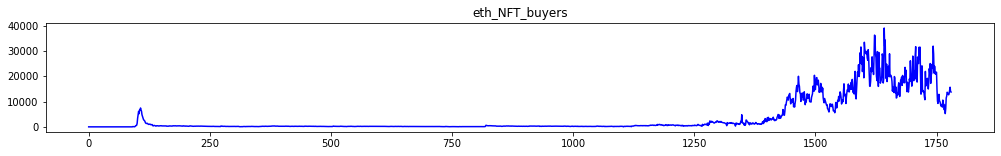

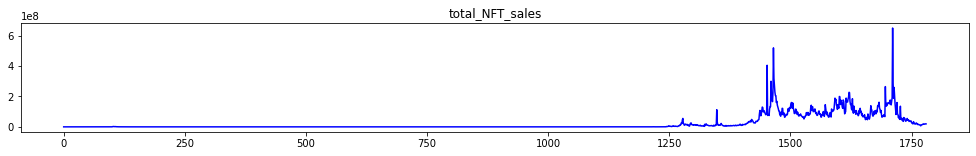

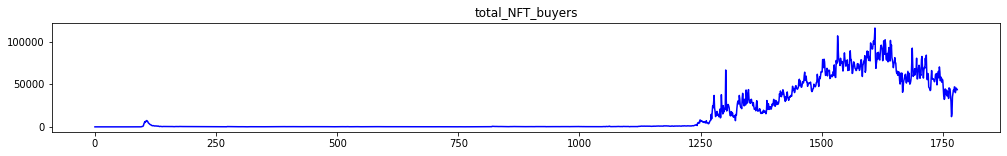

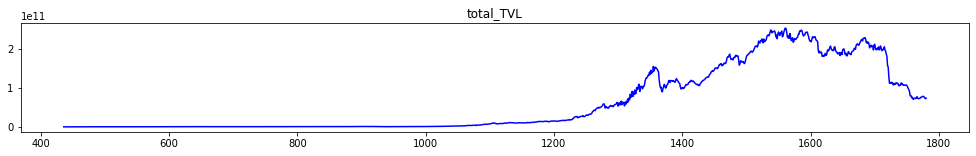

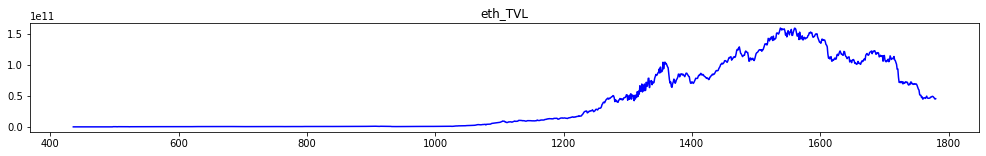

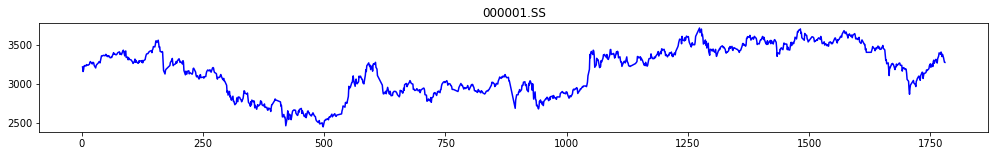

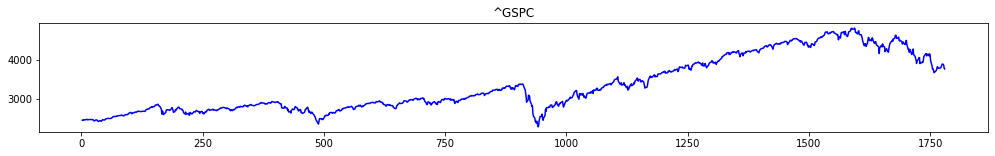

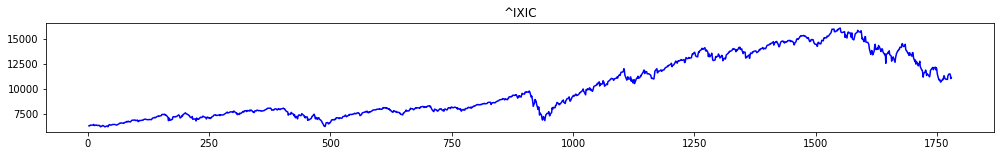

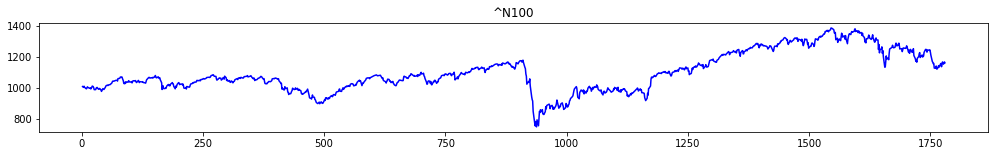

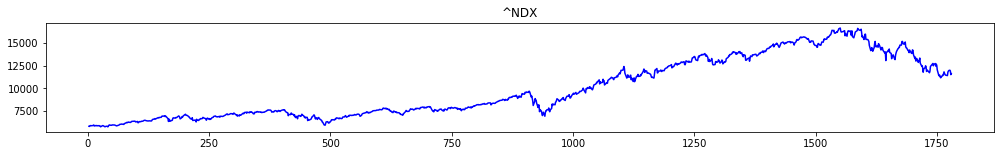

In [381]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in data.drop(columns='datetime').columns:
    color="orange" if col == "Price" else "blue"
    data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()
    


In [383]:
import numpy as np
data.total_TVL.replace(np.nan, 0, inplace=True)
data.eth_TVL.replace(np.nan, 0, inplace=True)

In [384]:
data = data.iloc[2:]
data = data.iloc[:-1]

In [392]:
data.to_csv(os.path.join('..','raw_data', 'data_advanced.csv'))

In [390]:
print(data.isnull().sum().sort_values(ascending=False))



price_usd                                  0
eth_NFT_sales                              0
sentiment_negative_total                   0
sentiment_balance_total                    0
social_dominance_total                     0
social_volume_total                        0
unique_social_volume_total_5m              0
whale_transaction_count_100k_usd_to_inf    0
whale_transaction_count_1m_usd_to_inf      0
btc_price_usd                              0
eth_NFT_buyers                             0
dev_activity_contributors_count            0
total_NFT_sales                            0
total_NFT_buyers                           0
total_TVL                                  0
eth_TVL                                    0
000001.SS                                  0
^GSPC                                      0
^IXIC                                      0
^N100                                      0
sentiment_positive_total                   0
dev_activity                               0
volume_usd

In [387]:
total_features_toplot = (['price_usd', 'volume_usd', 'twitter_followers',
       'daily_opening_price_usd', 'daily_high_price_usd',
       'daily_low_price_usd', 'daily_closing_price_usd', 'daily_avg_price_usd',
       'daily_trading_volume_usd', 'marketcap_usd', 'mvrv_usd', 'nvt',
       'circulation_1d', 'dormant_circulation_90d', 'exchange_balance',
       'daily_active_addresses', 'network_growth', 'transaction_volume',
       'transaction_volume_usd', 'fees_usd', 'velocity', 'dev_activity',
       'dev_activity_contributors_count', 'community_messages_count_total',
       'sentiment_positive_total', 'sentiment_negative_total',
       'sentiment_balance_total', 'social_dominance_total',
       'social_volume_total', 'unique_social_volume_total_5m',
       'whale_transaction_count_100k_usd_to_inf',
       'whale_transaction_count_1m_usd_to_inf', 'btc_price_usd',
       'eth_NFT_sales', 'eth_NFT_buyers', 'total_NFT_sales',
       'total_NFT_buyers', 'total_TVL', 'eth_TVL', '000001.SS', '^GSPC',
       '^IXIC', '^N100', '^NDX'])



In [169]:
total_features = ('price_usd', 'volume_usd', 'twitter_followers',
       'daily_opening_price_usd', 'daily_high_price_usd',
       'daily_low_price_usd', 'daily_closing_price_usd', 'daily_avg_price_usd',
       'daily_trading_volume_usd', 'marketcap_usd', 'mvrv_usd', 'nvt',
       'circulation_1d', 'dormant_circulation_90d', 'exchange_balance',
       'daily_active_addresses', 'network_growth', 'transaction_volume',
       'transaction_volume_usd', 'fees_usd', 'velocity', 'dev_activity',
       'dev_activity_contributors_count', 'community_messages_count_total',
       'sentiment_positive_total', 'sentiment_negative_total',
       'sentiment_balance_total', 'social_dominance_total',
       'social_volume_total', 'unique_social_volume_total_5m',
       'whale_transaction_count_100k_usd_to_inf',
       'whale_transaction_count_1m_usd_to_inf', 'btc_price_usd',
       'eth_NFT_sales', 'eth_NFT_buyers', 'total_NFT_sales',
       'total_NFT_buyers', 'total_TVL', 'eth_TVL', '000001.SS', '^GSPC',
       '^IXIC', '^N100', '^NDX')

